In [2]:
import numpy as np
import xarray as xr
from main import paths, lx
import matplotlib.pyplot as plt
from main_valid import EUC_vbounds, plot_eq_velocity
from main_valid import open_tao_data, plot_tao_timeseries

# Path to save figures, save data and OFAM model output.
fpath, dpath, xpath, lpath, tpath = paths()



In [3]:
for df, df1, l, c in zip([dg, di, ds], [dg1, di1, ds1], ['grenier', 'izumo', 'static']):
    df = xr.open_dataset(dpath/('ofam_EUC_transport_{}_{}.nc'.format(method, lx['exp_abr'][0])))
    df1 = xr.open_dataset(dpath/('ofam_EUC_transport_{}_{}.nc'.format(method, lx['exp_abr'][1])))
    

NameError: name 'dg' is not defined

In [307]:
exp = 0
method = 'static'
ds = xr.open_dataset(dpath/('ofam_EUC_transport_{}_{}.nc'.format(method, lx['exp_abr'][exp])))
method = 'grenier'
dg = xr.open_dataset(dpath/('ofam_EUC_transport_{}_{}.nc'.format(method, lx['exp_abr'][exp])))
method = 'izumo'
di = xr.open_dataset(dpath/('ofam_EUC_transport_{}_{}.nc'.format(method, lx['exp_abr'][exp])))
exp = 1
method = 'static'
ds1 = xr.open_dataset(dpath/('ofam_EUC_transport_{}_{}.nc'.format(method, lx['exp_abr'][exp])))
method = 'grenier'
dg1 = xr.open_dataset(dpath/('ofam_EUC_transport_{}_{}.nc'.format(method, lx['exp_abr'][exp])))
method = 'izumo'
di1 = xr.open_dataset(dpath/('ofam_EUC_transport_{}_{}.nc'.format(method, lx['exp_abr'][exp])))
print(ds1, dg1, di1)

<xarray.Dataset>
Dimensions:   (Time: 11687, xu_ocean: 3)
Coordinates:
  * Time      (Time) datetime64[ns] 2070-01-01T12:00:00 ... 2101-12-31T12:00:00
  * xu_ocean  (xu_ocean) int64 165 190 220
Data variables:
    uvo       (Time, xu_ocean) float64 ... <xarray.Dataset>
Dimensions:   (Time: 11687, xu_ocean: 3)
Coordinates:
  * Time      (Time) datetime64[ns] 2070-01-01T12:00:00 ... 2101-12-31T12:00:00
  * xu_ocean  (xu_ocean) int64 165 190 220
Data variables:
    uvo       (Time, xu_ocean) float64 ... <xarray.Dataset>
Dimensions:   (Time: 11687, xu_ocean: 3)
Coordinates:
  * Time      (Time) datetime64[ns] 2070-01-01T12:00:00 ... 2101-12-31T12:00:00
  * xu_ocean  (xu_ocean) int64 165 190 220
Data variables:
    uvo       (Time, xu_ocean) float64 ...


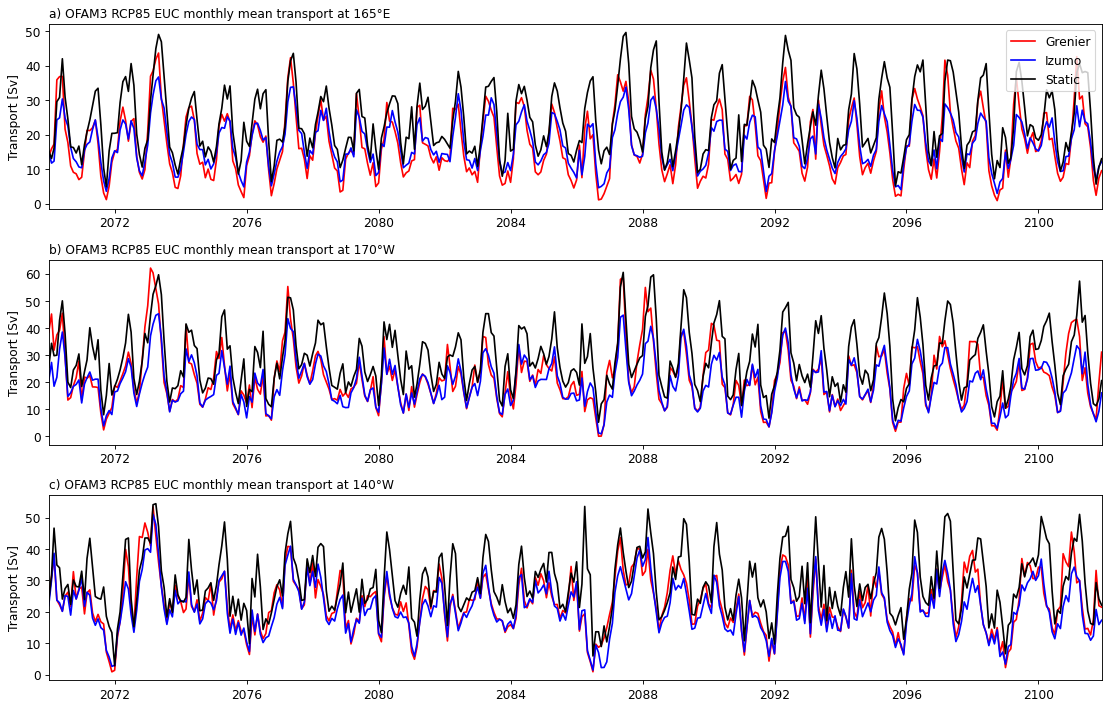

In [317]:
exp=1
fig = plt.figure(figsize=(14, 9))
for i in range(3):
    ax = fig.add_subplot(3, 1, i+1)
    for df, df1, l, c in zip([dg, di, ds], [dg1, di1, ds1], ['Grenier', 'Izumo', 'Static'], [ 'r', 'b', 'k']):
        df = df.isel(xu_ocean=i).resample(Time='MS').mean()
        if exp == 0:
            u = df.uvo
            time = df.Time
        else:
            df1 = df1.isel(xu_ocean=i).resample(Time='MS').mean()
            time = df1.Time
            if exp == 1:
                u = df1.uvo
            else:
                u = df1.uvo.values - df.uvo.values
                plt.hlines(y=0, xmin=time[0], xmax=time[-1], color='lightgrey')
        plt.title('{}OFAM3 {} EUC monthly mean transport at {}'.format(lx['l'][i], lx['exps'][exp], lx['lonstr'][i]), loc='left')
        plt.plot(time, u/SV, label=l, color=c)
        plt.xlim(xmin=time[0], xmax=time[-1])
        plt.ylabel('Transport [Sv]')
        if i == 0:
            plt.legend(loc=1)
plt.tight_layout()
plt.savefig(fpath/'EUC_transport_definitions_{}.png'.format(lx['exp_abr'][exp]))
    

<xarray.Dataset>
Dimensions:   (Time: 11688, xu_ocean: 3)
Coordinates:
  * Time      (Time) datetime64[ns] 1981-01-01T12:00:00 ... 2012-12-31T12:00:00
  * xu_ocean  (xu_ocean) int64 165 190 220
Data variables:
    uvo       (Time, xu_ocean) float64 ...

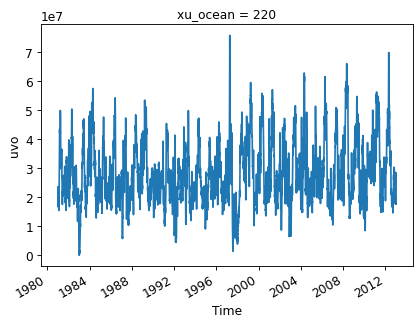